# WeRateDogs Twitter Data Wrangling

### Table of contents

Project Objectives

 Step 1: Gather Data
 
 Step 2: Assess Data
 
 Step 3: Clean Data

Project objectives
Perform data wrangling (gathering, assessing and cleaning) on provided thee sources of data.
Store, analyze, and visualize the wrangled data.
Reporting on 1) data wrangling efforts and 2) data analyses and visualizations

In [1]:
# Import the libraries that we will need in this project
import pandas as pd
import datetime as dt
import numpy as np
import requests
import tweepy
import json
import re
import time
import matplotlib.pyplot as plt

We imported the required libraries

## Step 1: Gathering data


In [2]:
#Read csv and import it to a dataframe
df_tw = pd.read_csv('twitter-archive-enhanced.csv')

## Image prediction

In [3]:
# Using Requests library to download a file then store it in a tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)

# Read the downloaded file into a dataframe 'images'
df_im = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')


## Twitter API

In [4]:
consumer_key = 'qhSwqxpKslaBZofulQi598DrI'
consumer_secret = 'UTdmFpZb24IHcGc8CAaxArwq6LfyVMgUZz1gSuJuHyu7lj7hD0'
access_token = '793618519-K9kFIsgzD9vhp14kD5GxOLnGFEGl3jnjVZnwcMh5'
access_token_secret = 'ySEfCVU4qhRHZ8dTC7r1geQjFABInO0r79MWlK6TZxzLB'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Construct the API instance
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), # Parse the result to Json Object
                 wait_on_rate_limit = True,)# Automatically wait for rate limits to replenish
                  # Print a notification when Tweepy is waiting for rate limits to replenish

In [5]:
# Liste where we will store the dictionaries of our result
df_list = []
# Liste frame where we will store the tweet_id of the errors
error_list = []

# Calculate the time of excution
start = time.time()

# Get the tweet object for all the teweets in archive dataframe 
for tweet_id in df_tw['tweet_id']:
    try:
        page = api.get_status(tweet_id, tweet_mode = 'extended')
        # Print one page to look at the structure of the returned file
        # and the names of attributes
        # print(json.dumps(page, indent = 4))
        #break
        
        favorites = page['favorite_count'] # How many favorites the tweet had
        retweets = page['retweet_count'] # Count of the retweet
        user_followers = page['user']['followers_count'] # How many followers the user had
        user_favourites = page['user']['favourites_count'] # How many favorites the user had
        date_time = page['created_at'] # The date and time of the creation
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    
    # Catch the exceptions of the TweepError
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)

# Calculate the time of excution
end = time.time()
print(end - start)


888202515573088257 _ 404 Not Found
144 - No status found with that ID.
873697596434513921 _ 404 Not Found
144 - No status found with that ID.
872668790621863937 _ 404 Not Found
144 - No status found with that ID.
872261713294495745 _ 404 Not Found
144 - No status found with that ID.
869988702071779329 _ 404 Not Found
144 - No status found with that ID.
866816280283807744 _ 404 Not Found
144 - No status found with that ID.
861769973181624320 _ 404 Not Found
144 - No status found with that ID.
856602993587888130 _ 404 Not Found
144 - No status found with that ID.
856330835276025856 _ 404 Not Found
144 - No status found with that ID.
851953902622658560 _ 404 Not Found
144 - No status found with that ID.
851861385021730816 _ 404 Not Found
144 - No status found with that ID.
845459076796616705 _ 404 Not Found
144 - No status found with that ID.
844704788403113984 _ 404 Not Found
144 - No status found with that ID.
842892208864923648 _ 404 Not Found
144 - No status found with that ID.
837366

Rate limit reached. Sleeping for: 70


754011816964026368 _ 404 Not Found
144 - No status found with that ID.
680055455951884288 _ 404 Not Found
144 - No status found with that ID.
672604026190569472 _ 503 Service Unavailable
130 - Over capacity
6378.428581476212


In [6]:
# lengh of the result
print("The lengh of the result", len(df_list))
# The tweet_id of the errors
print("The lengh of the errors", len(error_list))

The lengh of the result 2325
The lengh of the errors 31


In [8]:
# We repeat the same operation for the tweet_ids that we coudln't get and append the result to df_list
ee_list = []
for e in error_list:
    try:
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        user_followers = page['user']['followers_count']
        user_favourites = page['user']['favourites_count']
        date_time = page['created_at']
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        
    except Exception:
        print(str(tweet_id)+ " _ " + str(e))
        ee_list.append(e)

In [9]:
# We can see that now the 7 errors saved in the list
# lengh of the result
print("The lengh of the result after Querying the errors separately", len(df_list))

The lengh of the result after Querying the errors separately 2356


In [10]:
# Create DataFrames from list of dictionaries
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])

# Save the dataFrame in file
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [11]:
# Read the saved tweet_json.txt file into a dataframe
json_tweets = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
json_tweets

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33728,6979,9338933,147177,2017-08-01 16:23:56+00:00
1,892177421306343426,29255,5280,9338933,147177,2017-08-01 00:17:27+00:00
2,891815181378084864,21987,3466,9338933,147177,2017-07-31 00:18:03+00:00
3,891689557279858688,36823,7198,9338933,147177,2017-07-30 15:58:51+00:00
4,891327558926688256,35207,7723,9338933,147177,2017-07-29 16:00:24+00:00
...,...,...,...,...,...,...
2351,666020888022790149,2285,421,9338922,147177,2015-11-15 22:32:08+00:00
2352,666020888022790149,2285,421,9338922,147177,2015-11-15 22:32:08+00:00
2353,666020888022790149,2285,421,9338922,147177,2015-11-15 22:32:08+00:00
2354,666020888022790149,2285,421,9338922,147177,2015-11-15 22:32:08+00:00


In [12]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2356 non-null   int64 
 1   favorites        2356 non-null   int64 
 2   retweets         2356 non-null   int64 
 3   user_followers   2356 non-null   int64 
 4   user_favourites  2356 non-null   int64 
 5   date_time        2356 non-null   object
dtypes: int64(5), object(1)
memory usage: 110.6+ KB


## Gather: Summary

Gathering is the first step in the data wrangling process. We could finish the high-level gathering process:

    Obtaining data
        Getting data from an existing file (twitter-archive-enhanced.csv) Reading from csv file using pandas
        Downloading a file from the internet (image-predictions.tsv) Downloading file using requests
        Querying an API (tweet_json.txt) Get JSON object of all the tweet_ids using Tweepy

    Importing that data into our programming environment (Jupyter Notebook)



## Assess

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues will be our next step. We will detect and document at quality issues and tidiness issues.


.



## Step 2: Assessing the Data 



#### df_tw - WeRateDogs Twitter Archive

I will focus  on variables that will be used later on, namely:

   - tweet_id (int64) unique identifier of a tweet

   - timestamp (datetime) UTC time when this Tweet was created

   - source (str) Utility used to post the Tweet, as an HTML-formatted string
  
   - text (str) The actual UTF-8 text of the status update
  
   - rating_numerator (int64) dog rating numerator
  
   - rating_denominator (int64) dog rating denominator
  
   - name - dog's name
  
   - doggo, floofer, pupper, puppo are kind of a dog personality

In [15]:
df_tw

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [16]:
#Print some random examples from column values 
#Random number just to check if we can find something suspisious
print(df_tw['text'][200])
print(df_tw['name'][15])

At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
Oliver


In [17]:
#Assessing the data programmatically
df_tw.info()
df_tw.describe()
df_tw['rating_numerator'].value_counts()
df_tw['rating_denominator'].value_counts()
df_tw['name'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64


#### The Images 

In [19]:
df_im

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
df_im.info()
df_im['jpg_url'].value_counts()
df_im[df_im['jpg_url'] == 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True



#### Json tweets

In [21]:
#Print json tweeets
json_tweets

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33728,6979,9338933,147177,2017-08-01 16:23:56+00:00
1,892177421306343426,29255,5280,9338933,147177,2017-08-01 00:17:27+00:00
2,891815181378084864,21987,3466,9338933,147177,2017-07-31 00:18:03+00:00
3,891689557279858688,36823,7198,9338933,147177,2017-07-30 15:58:51+00:00
4,891327558926688256,35207,7723,9338933,147177,2017-07-29 16:00:24+00:00
...,...,...,...,...,...,...
2351,666020888022790149,2285,421,9338922,147177,2015-11-15 22:32:08+00:00
2352,666020888022790149,2285,421,9338922,147177,2015-11-15 22:32:08+00:00
2353,666020888022790149,2285,421,9338922,147177,2015-11-15 22:32:08+00:00
2354,666020888022790149,2285,421,9338922,147177,2015-11-15 22:32:08+00:00


In [22]:
#Print out json tweets information
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2356 non-null   int64 
 1   favorites        2356 non-null   int64 
 2   retweets         2356 non-null   int64 
 3   user_followers   2356 non-null   int64 
 4   user_favourites  2356 non-null   int64 
 5   date_time        2356 non-null   object
dtypes: int64(5), object(1)
memory usage: 110.6+ KB


In [23]:
#Count tweet ids
json_tweets['tweet_id'].value_counts()

666020888022790149    32
688828561667567616     1
687460506001633280     1
687399393394311168     1
687317306314240000     1
                      ..
772877495989305348     1
772826264096874500     1
772615324260794368     1
772581559778025472     1
717841801130979328     1
Name: tweet_id, Length: 2325, dtype: int64

In [24]:
#Check is user_followers had a meaning
json_tweets['user_followers'].value_counts()

9338933    499
9338915    436
9338939    402
9338938    257
9338934    179
9338922    124
9338920    103
9338936    100
9338937     63
9338919     47
9338917     28
9338935     28
9338940     24
9338918     11
9338921      9
9338916      9
9339352      5
9339343      5
9339310      4
9339305      4
9339304      3
9339309      3
9339363      3
9339307      2
9339353      1
9339296      1
9339308      1
9339340      1
9339300      1
9339364      1
9339357      1
9339303      1
Name: user_followers, dtype: int64




The following are some of the descriptions of the variables in the dataset:

   - tweet_id: The integer representation of the unique identifier for this Tweet.
    
   - in_reply_to_status_id: If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
    
   - in_reply_to_user_id_str: If the represented Tweet is a reply, this field will contain the string representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet
    
   - retweet_count: Number of times this Tweet has been retweeted
    
   - favorite_count: Indicates approximately how many times this Tweet has been liked by Twitter users



## Quality

Here, we are looking at the accuracy and the consistency of the data.

twitter archive dataset

   - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be intergs instead of float
   - retweeted_status_timestamp, timestamp should be datetime instead of object (string)
   - The numerator and denominator columns have invalid values
   - In several columns null objects are non-null (None to NaN)
   - Name column have invalid names i.e 'None', 'a', 'an'
   - We only want original ratings (no retweets) that have images
   - We may want to change this columns type (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id) to string because We don't want any operations on them

images dataset

  - Missing values from images dataset (2075 rows instead of 2356)
  - Some tweet_ids have the same jpg_url
  - Some tweets are have 2 different tweet_id one redirect to the other

json_tweeets dataset

   - This tweet_id (666020888022790149) duplicated 8 times


### Tidiness

At this point, we look and identify the untidy data in the datasets.


   .No need to all the informations in images dataset, (tweet_id and jpg_url what matters)
   
   .Various stages of dogs in columns instead of rows archives dataset
   
   .We may want to add a gender column from the text columns in archives dataset
   
   .All tables should be part of one dataset

NB : We could add a column called jpg_url_api contain the query of the api media_url_https it will have the same result as the images dataset


## Step 3: Cleaning the Data

In data wrangling, cleaning the data is the third step. This is where we fix the quality and tidiness issues that we identified in the assessment step.

In [26]:
#Create a copy of the original 3 datasets for reference
df_tw_clean = df_tw.copy()
df_im_clean = df_im.copy()
json_tweets_clean = json_tweets.copy()


### Merging the Datasets


In [27]:
#We will create a high quality and tidy pandas DataFrame
# we will start by merging our dataframe in one
# the we save the result in file as backup
df_clean = pd.merge(df_tw, df_im, how = 'left', on = ['tweet_id'] )
df_clean = pd.merge(df_clean, json_tweets, how = 'left', on = ['tweet_id'])


Saving the result ofthe merged file

In [28]:
#We will the save the result in  a file 
df_clean.to_csv('df_clean.csv', encoding = 'utf-8')

In [30]:
df_clean.head().T

,0,1,2,3,4
tweet_id,892420643555336193,892177421306343426,891815181378084864,891689557279858688,891327558926688256
in_reply_to_status_id,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN
timestamp,2017-08-01 16:23:56 +0000,2017-08-01 00:17:27 +0000,2017-07-31 00:18:03 +0000,2017-07-30 15:58:51 +0000,2017-07-29 16:00:24 +0000
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
text,This is Phineas. He's a mystical boy. Only eve...,This is Tilly. She's just checking pup on you....,This is Archie. He is a rare Norwegian Pouncin...,This is Darla. She commenced a snooze mid meal...,This is Franklin. He would like you to stop ca...
retweeted_status_id,NaN,NaN,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN,NaN,NaN
retweeted_status_timestamp,NaN,NaN,NaN,NaN,NaN
expanded_urls,https://twitter.com/dog_rates/status/892420643...,https://twitter.com/dog_rates/status/892177421...,https://twitter.com/dog_rates/status/891815181...,https://twitter.com/dog_rates/status/891689557...,https://twitter.com/dog_rates/status/891327558...


In [31]:
#Getting information of the DataFrame we have created
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2387 entries, 0 to 2386
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2387 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2387 non-null   object 
 4   source                      2387 non-null   object 
 5   text                        2387 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2328 non-null   object 
 10  rating_numerator            2387 non-null   int64  
 11  rating_denominator          2387 non-null   int64  
 12  name                        2387 non-null   object 
 13  doggo                       2387 

From the data, it can be seen that there are 7 additional rows. This maybe because of the second query for those tweet_id that tweepy except throw.
When clesaning our data, we will investigate this more.


## Cleaning up rows and columns that we will not require

In [32]:
# Delete the retweets
df_clean = df_clean[pd.isnull(df_clean.retweeted_status_id)]
# Delete duplicated tweet_id
df_clean = df_clean.drop_duplicates()
# Delete tweets with no pictures
df_clean = df_clean.dropna(subset = ['jpg_url'])

# test
len(df_clean)

1994

In [38]:
# Delete columns related to retweet we don't need anymore
#df_clean = df_clean.drop('retweeted_status_id', axis=1)
#df_clean = df_clean.drop('retweeted_status_user_id', 1)
#df_clean = df_clean.drop('retweeted_status_timestamp', 1)

# Delete column date_time we imported from the API, it has the same values as timestamp column
#df_clean = df_clean.drop('date_time', 1)

# test
#list(df_clean)

## Get counts of the dogs: 'doggo', 'pupper', 'floofer' and 'puppo'

In [39]:
# Check the values in those columns by excuting those columns
print(df_clean.doggo.value_counts())
print(df_clean.floofer.value_counts())
print(df_clean.pupper.value_counts())
print(df_clean.puppo.value_counts())

None     1920
doggo      74
Name: doggo, dtype: int64
None       1986
floofer       8
Name: floofer, dtype: int64
None      1782
pupper     212
Name: pupper, dtype: int64
None     1971
puppo      23
Name: puppo, dtype: int64


Displayed here are the dog types.





## Have a look at duplicated values 

In [41]:
#Print the count of the unique elements in all columns
df_clean.apply(lambda x: len(x.unique()))

tweet_id                 1994
in_reply_to_status_id      23
in_reply_to_user_id         2
timestamp                1994
source                      3
text                     1994
expanded_urls            1994
rating_numerator           34
rating_denominator         15
name                      936
doggo                       2
floofer                     2
pupper                      2
puppo                       2
jpg_url                  1994
img_num                     4
p1                        374
p1_conf                  1991
p1_dog                      2
p2                        401
p2_conf                  1989
p2_dog                      2
p3                        405
p3_conf                  1991
p3_dog                      2
favorites                1831
retweets                 1505
user_followers             31
user_favourites             3
dtype: int64

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  doggo                  1994 non-null   object 
 11  floofer                1994 non-null   object 
 12  pupper                 1994 non-null   object 
 13  puppo                  1994 non-null   object 
 14  jpg_url                1994 non-null   object 
 15  img_

In [46]:
#Delete the columns related to replies from the master dataframe
df_clean = df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

In [47]:
#Confirming if the columns have been deleted
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   doggo               1994 non-null   object 
 9   floofer             1994 non-null   object 
 10  pupper              1994 non-null   object 
 11  puppo               1994 non-null   object 
 12  jpg_url             1994 non-null   object 
 13  img_num             1994 non-null   float64
 14  p1                  1994 non-null   object 
 15  p1_conf             1994 non-null   float64
 16  p1_dog

In [49]:
#Create a copy of the clean dataframe for reference
df_clean_1 = df_clean.copy()

In [50]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   doggo               1994 non-null   object 
 9   floofer             1994 non-null   object 
 10  pupper              1994 non-null   object 
 11  puppo               1994 non-null   object 
 12  jpg_url             1994 non-null   object 
 13  img_num             1994 non-null   float64
 14  p1                  1994 non-null   object 
 15  p1_conf             1994 non-null   float64
 16  p1_dog

#### Melt the 4 categorical dog types 'doggo', 'floofer', 'pupper', and 'puppo' into i column 'dog_type'

In [52]:
# Check how many dog types there are of each
df_clean['doggo'].value_counts()

None     1920
doggo      74
Name: doggo, dtype: int64

In [53]:
df_clean['floofer'].value_counts()

None       1986
floofer       8
Name: floofer, dtype: int64

In [54]:
df_clean['pupper'].value_counts()

None      1782
pupper     212
Name: pupper, dtype: int64

In [56]:
df_clean['puppo'].value_counts()

None     1971
puppo      23
Name: puppo, dtype: int64

In [57]:
# Create list of columns for copying and pasting with melt function
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorites',
       'retweets', 'user_followers', 'user_favourites'],
      dtype='object')

In [64]:
# Melt the 4 columns into a column'types' to be deleted and a value'dog_type'column to keep.
df = pd.melt(df_clean, 
        id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorites',
       'retweets', 'user_followers', 'user_favourites'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_type')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            7976 non-null   int64  
 1   timestamp           7976 non-null   object 
 2   source              7976 non-null   object 
 3   text                7976 non-null   object 
 4   expanded_urls       7976 non-null   object 
 5   rating_numerator    7976 non-null   int64  
 6   rating_denominator  7976 non-null   int64  
 7   name                7976 non-null   object 
 8   jpg_url             7976 non-null   object 
 9   img_num             7976 non-null   float64
 10  p1                  7976 non-null   object 
 11  p1_conf             7976 non-null   float64
 12  p1_dog              7976 non-null   object 
 13  p2                  7976 non-null   object 
 14  p2_conf             7976 non-null   float64
 15  p2_dog              7976 non-null   object 
 16  p3    

In [66]:
# Check we still have all our dog types
df.dog_type.value_counts()

None       7659
pupper      212
doggo        74
puppo        23
floofer       8
Name: dog_type, dtype: int64

We can see that we still have our dog types.

#### Dropping columns that we do not need

In [68]:
# Drop predictions and prediction probability columns
df = df.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog'], axis=1)

In [70]:
# Check columns have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            7976 non-null   int64  
 1   timestamp           7976 non-null   object 
 2   source              7976 non-null   object 
 3   text                7976 non-null   object 
 4   expanded_urls       7976 non-null   object 
 5   rating_numerator    7976 non-null   int64  
 6   rating_denominator  7976 non-null   int64  
 7   name                7976 non-null   object 
 8   jpg_url             7976 non-null   object 
 9   p3                  7976 non-null   object 
 10  p3_conf             7976 non-null   float64
 11  p3_dog              7976 non-null   object 
 12  favorites           7940 non-null   float64
 13  retweets            7940 non-null   float64
 14  user_followers      7940 non-null   float64
 15  user_favourites     7940 non-null   float64
 16  types 

Change dog names in names column for clearly incorrect data

In [71]:
# Check the list of dog names.
list(df['name'])

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Emmy',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'Cash',
 'Jed',
 'None',
 'Sebastian',
 'None',
 'Sierra',
 'None',
 'None',
 'Monkey',
 'None',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Boomer',
 'None',
 'Cody',
 'Zoey',
 'Rumble',
 'Clifford',
 'Dewey',
 'Stanley',
 'Scout',
 'Gizmo',

In [73]:
# We see all incorrect names have their first letter has lowercase. We will use this to change them into 'None'. 
names=[]

#function iterates through name column checking if the first letter is lowercase.
def incorrect_name(row):
    if row['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(row['name'])
        
# call function using pandas apply by columns
df.apply(incorrect_name, axis=1)


#add names list to master dataframe and check dataframe
df['names'] = names
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites,types,dog_type,names
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,banana,0.076110,False,33728.0,6979.0,9338933.0,147177.0,doggo,None,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,papillon,0.068957,True,29255.0,5280.0,9338933.0,147177.0,doggo,None,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,kelpie,0.031379,True,21987.0,3466.0,9338933.0,147177.0,doggo,None,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,spatula,0.040836,False,36823.0,7198.0,9338933.0,147177.0,doggo,None,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,German_short-haired_pointer,0.175219,True,35207.0,7723.0,9338933.0,147177.0,doggo,None,Franklin


In [74]:
# print a list to check only names are present
df['names'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

In [75]:
# update original name column
df['name'] = df['names']

In [76]:
# delete names column
df = df.drop('names', axis=1)

In [77]:
# check name column is updated correctly.
df['name'].value_counts()

None          2576
Charlie         44
Cooper          40
Lucy            40
Oliver          40
              ... 
Leela            4
Glenn            4
Shelby           4
Sephie           4
Christoper       4
Name: name, Length: 914, dtype: int64

Having a look at the rating_denominator and rating_numerator

In [78]:
# List the different denominators
df.rating_denominator.value_counts()

10     7904
50       12
11        8
80        8
70        4
7         4
150       4
170       4
20        4
90        4
40        4
130       4
110       4
120       4
2         4
Name: rating_denominator, dtype: int64

In [79]:
# List the different numerator
df.rating_numerator.value_counts()

12      1800
10      1676
11      1584
13      1044
9        604
8        380
7        208
14       140
5        132
6        128
3         76
4         64
2         36
1         20
0          8
45         4
144        4
88         4
26         4
121        4
143        4
44         4
60         4
165        4
80         4
99         4
50         4
204        4
1776       4
27         4
75         4
24         4
84         4
420        4
Name: rating_numerator, dtype: int64

### Save a copy of the dataframe for future reference

We will now have a clean dataframe called clean_df

.

A copy of the new dataframe will be made forfuture reference.

In [81]:
# Save a copy of the dataframe to csv for future reference
df.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

In [82]:
clean_df = pd.read_csv('twitter_archive_master.csv')

In [83]:
clean_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p3,p3_conf,p3_dog,favorites,retweets,user_followers,user_favourites,types,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,banana,0.076110,False,33728.0,6979.0,9338933.0,147177.0,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,papillon,0.068957,True,29255.0,5280.0,9338933.0,147177.0,doggo,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,kelpie,0.031379,True,21987.0,3466.0,9338933.0,147177.0,doggo,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,spatula,0.040836,False,36823.0,7198.0,9338933.0,147177.0,doggo,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,German_short-haired_pointer,0.175219,True,35207.0,7723.0,9338933.0,147177.0,doggo,None


## Analyzing the Data

In [85]:
# Quick analysis of some of the numbers 
clean_df.describe()

,tweet_id,rating_numerator,rating_denominator,p3_conf,favorites,retweets,user_followers,user_favourites
count,7.976000e+03,7976.000000,7976.000000,7.976000e+03,7940.000000,7940.000000,7.940000e+03,7940.000000
mean,7.358508e+17,12.280843,10.532096,6.024848e-02,7690.982368,2235.654912,9.338936e+06,147177.030227
std,6.746547e+16,41.489912,7.319333,5.088110e-02,11340.594437,4003.366308,5.044407e+01,0.346422
min,6.660209e+17,0.000000,2.000000,1.740170e-10,66.000000,11.000000,9.338915e+06,147177.000000
25%,6.758457e+17,10.000000,10.000000,1.619070e-02,1646.000000,494.000000,9.338919e+06,147177.000000
50%,7.084748e+17,11.000000,10.000000,4.950530e-02,3451.000000,1078.000000,9.338933e+06,147177.000000
75%,7.878106e+17,12.000000,10.000000,9.160200e-02,9527.000000,2550.000000,9.338938e+06,147177.000000
max,8.924206e+17,1776.000000,170.000000,2.734190e-01,144402.000000,70428.000000,9.339364e+06,147181.000000


Some of the questions we can answer using our analysis are:

a) Which are the most common dog names?

b) Which breeds obtain the highest rating?

c) Which breed receive most likes?

In [88]:
# Which dog names are the most  common
clean_df.name.value_counts().nlargest(10)


None       2576
Charlie      44
Cooper       40
Lucy         40
Oliver       40
Tucker       36
Penny        36
Sadie        32
Winston      32
Toby         28
Name: name, dtype: int64

In [90]:
#There are 2576 tweete where the dog name was unidentified - lets remove them from our analysis
clean_df.loc[clean_df['name'] == 'None', 'name'] = None

In [91]:
#Number of observations used for analysis and observations
clean_df.name.count()

5400

In [92]:
#Confirm that they have been removed
clean_df.name.value_counts().nlargest(10)

Charlie    44
Cooper     40
Lucy       40
Oliver     40
Penny      36
Tucker     36
Winston    32
Sadie      32
Toby       28
Lola       28
Name: name, dtype: int64

## A bar plot showing top 10 Dog Names.

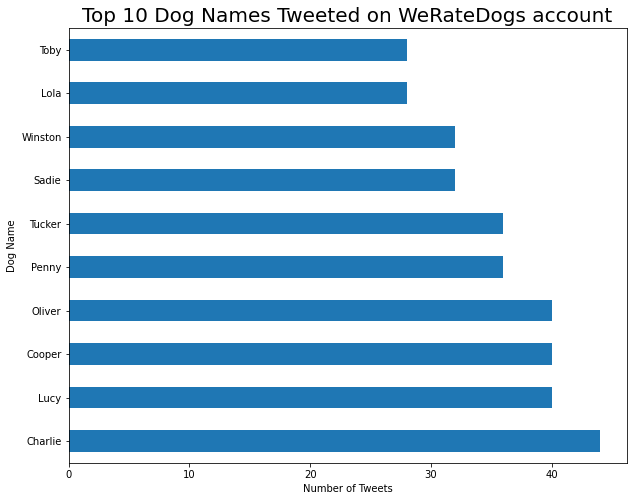

In [101]:
# Plot a horizontal bar chart to show top 15 breeds
fig = plt.figure(figsize=(10,8))
clean_df.groupby('name').count()['rating_numerator'].sort_values(ascending=False).nlargest(10).plot(kind='barh')
plt.title("Top 10 Dog Names Tweeted on WeRateDogs account",fontsize=20)
plt.ylabel("Dog Name")
plt.xlabel("Number of Tweets"); 

The above bar plot shows the top 10 dog names tweeted on WeRateDogs dataset.

Charlie is seen to be the most tweeted dog name.

### Resources

https://twitter.com/dog_rates

http://docs.tweepy.org/en/v3.6.0/api.html#api-reference

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_pickle.html

https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

https://stackoverflow.com/questions/25707558/json-valueerror-expecting-property-name-line-1-column-2-char-1